# Read CSV with TrackId and Genre Data

In [1]:
import pandas as pd

tracks_info_df = pd.read_csv('combined_dataset.csv')


# Read processed song data from pkl file

In [2]:
import pickle
import os


results_file = 'audio_features_backup.pkl'

if os.path.exists(results_file):
    with open(results_file, 'rb') as file:
        saved_data = pickle.load(file)
    X = saved_data.get('X', [])
    y_labels = saved_data.get('y_labels', [])
    
    processed_files = set(saved_data.get('processed_files', []))
    print(f"Loaded {len(processed_files)} processed tracks")


Loaded 100390 processed tracks


# Preprocess

## Turn X into an np array for easier processing

In [3]:
import numpy as np

X = np.array(X)
print("shape of feature matrix X: ", X.shape)


shape of feature matrix X:  (100390, 55)


## Remove all entries where the genre is defined as None

In [4]:
import numpy as np

X = X[np.array(y_labels) != None]
y_labels = np.array(y_labels)[np.array(y_labels) != None]

## Remap genres

### Replace sub-genres with their parent genre based on a predefined mapping

In [5]:
genre_mapping = {
    'lo-fi beats': 'lo-fi',
    'chillwave': 'lo-fi',

    'nu metal': 'metal',
    'folk metal': 'metal',
    'heavy metal': 'metal',
    'metalcore': 'metal',
    'power metal': 'metal',
    'industrial metal': 'metal',
    'glam metal': 'metal',
    'melodic death metal': 'metal',
    'progressive metal': 'metal',
    'thrash metal': 'metal',
    'gothic metal': 'metal',
    'groove metal': 'metal',
    'death metal': 'metal',
    'alternative metal': 'metal',
    'black metal': 'metal',
    'speed metal': 'metal',

    'acid house': 'acid',
    'acid techno': 'acid',

    'afrobeat': 'afro',
    'afropop': 'afro',

    'art rock': 'rock',

    'britpop': 'alternative rock',
    
    'art pop': 'pop',
    'acoustic pop': 'pop',
    'bedroom pop': 'pop',
    'soft pop': 'pop', 
    'folk pop': 'pop',
    'norwegian pop': 'pop',
    'acoustic pop': 'pop',
    'dream pop': 'pop',
    'chamber pop': 'pop',
    'german pop': 'pop',
    'bedroom pop': 'pop',
    'city pop': 'pop',
    'dance pop': 'pop',
    'art pop': 'pop',
    'indie pop': 'pop',

    'alt country': 'country',
    'traditional country': 'country',

    'blues rock': 'blues',

    'brooklyn drill': 'drill',

    'gangster rap': 'rap',
    'memphis rap': 'rap',
    'rock rap': 'rap',
    'meme rap': 'rap',
    'punk rap': 'rap',
    'emo rap': 'rap',
    'jazz rap': 'rap',
    'melodic rap': 'rap',
    'cloud rap': 'rap',
    'k-rap': 'rap',
    'rage rap': 'rap',

    'edm trap': 'trap',
    'italian trap': 'trap',
    'dark trap': 'trap',

    'hip-hop': 'hip hop',
    'southern hip hop': 'hip hop',
    'west coast hip hop': 'hip hop',
    'east coast hip hop': 'hip hop',
    'finnish hip hop': 'hip hop',
    'german hip hop': 'hip hop',
    'underground hip hop': 'hip hop',
    'norwegian hip hop': 'hip hop',
    'experimental hip hop': 'hip hop',
    'alternative hip hop': 'hip hop',
    'latin hip hop': 'hip hop',

    'jazz blues': 'jazz',
    'vocal jazz': 'jazz',
    'french jazz': 'jazz',
    'free jazz': 'jazz',
    'soul jazz': 'jazz',
    'jazz fusion': 'jazz',
    'nu jazz': 'jazz',
    'jazz funk': 'jazz',
    'cool jazz': 'jazz',
    'jazz beats': 'jazz',
    'jazz house': 'jazz',
    'indie jazz': 'jazz',
    'smooth jazz': 'jazz',

    'melodic techno': 'techno',
    'minimal techno': 'techno',
    'hypertechno': 'techno',
    'hard techno': 'techno',
    'hardcore techno': 'techno',
    'dub techno': 'techno',

    'future house': 'house',
    'tech house': 'house',
    'bass house': 'house',
    'electro house': 'house',
    'tropical house': 'house',
    'french house': 'house',
    'melodic house': 'house',
    'organic house': 'house',
    'progressive house': 'house',
    'latin house': 'house',
    'deep house': 'house',
    'slap house': 'house',
    'chicago house': 'house'
    
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels]


### Map hip-hop to rap -> Models without this are too confused due to the genres being so alike

In [16]:
genre_mapping = {
    'hip hop': 'rap'
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels_normalized]

In [6]:
# Or remove hip hop

X = X[np.array(y_labels_normalized) != "hip hop"]
y_labels_normalized = np.array(y_labels_normalized)[np.array(y_labels_normalized) != "hip hop"]

### Run this code in case the last two cells were not executed

In [5]:
y_labels_normalized = y_labels


### Extra: Keep only a popular type of genre

In [7]:
import numpy as np

original_labels_list = y_labels_normalized
y_labels_normalized = np.array(y_labels_normalized)


popular_genres = {
    'pop', 'rock', 'rap', 'hip hop', 'metal', 'country', 'jazz',
    'blues', 'classical', 'reggae', 'punk', 'funk',
    'r&b', 'soul', 'trap', 'techno', 'folk', 'indie'
}

y_lower = np.array([genre.lower() for genre in y_labels_normalized])

mask = np.array([genre in popular_genres for genre in y_lower])

X = X[mask]
y_labels_normalized = y_labels_normalized[mask]

# Optional: print some info
print(f"Filtered dataset size: {len(y_labels_normalized)} entries (from {len(original_labels_list)} original)")

Filtered dataset size: 13254 entries (from 98347 original)


### Chart the leftover genres

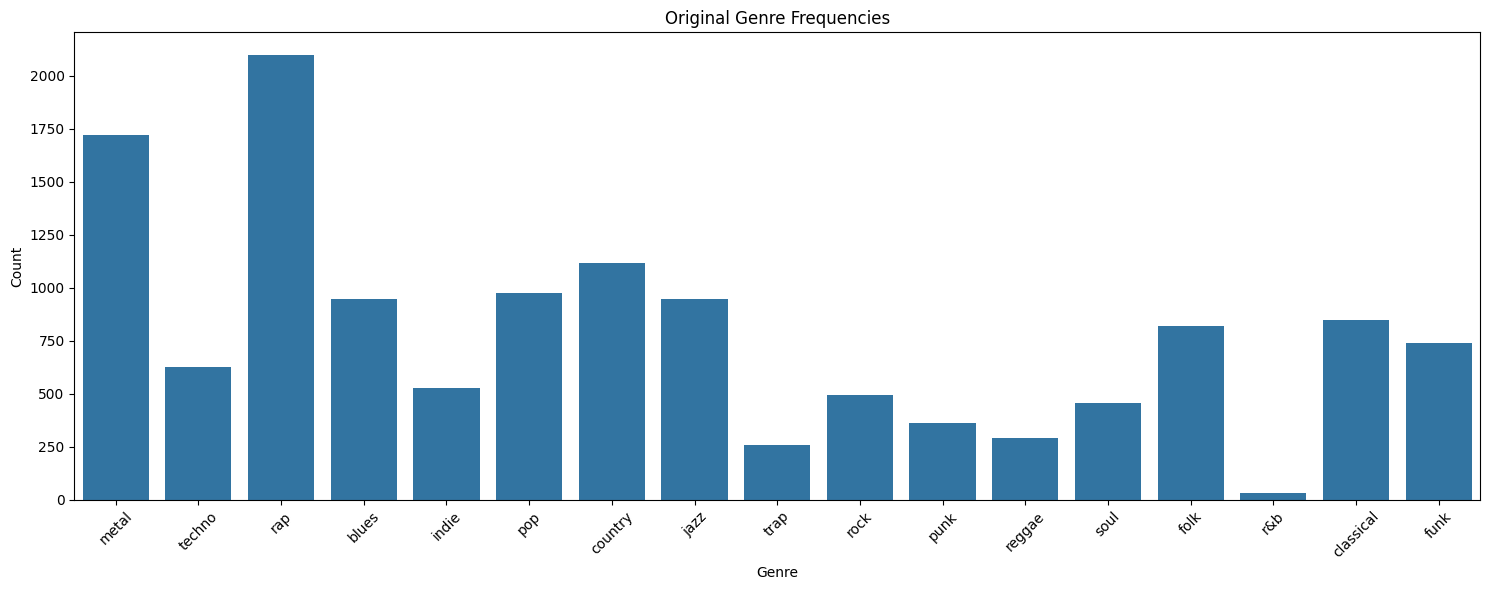

In [8]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


y = y_labels_normalized

freq_original = Counter(y)

orig_genres = list(freq_original.keys())
orig_counts = list(freq_original.values())

fig, axs = plt.subplots(figsize=(15, 6))

sns.barplot(x=orig_genres, y=orig_counts, ax=axs)
axs.set_title("Original Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Remove all songs with genres which do not come up more than n times

Class counts: Counter({'rap': 2100, 'metal': 1721, 'country': 1117, 'pop': 975, 'jazz': 948, 'blues': 947, 'classical': 849, 'folk': 819, 'funk': 738, 'techno': 626, 'indie': 525, 'rock': 494, 'soul': 457, 'punk': 360, 'reggae': 291, 'trap': 258, 'r&b': 29})


/tmp/ipykernel_217466/1765738642.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(le.classes_)


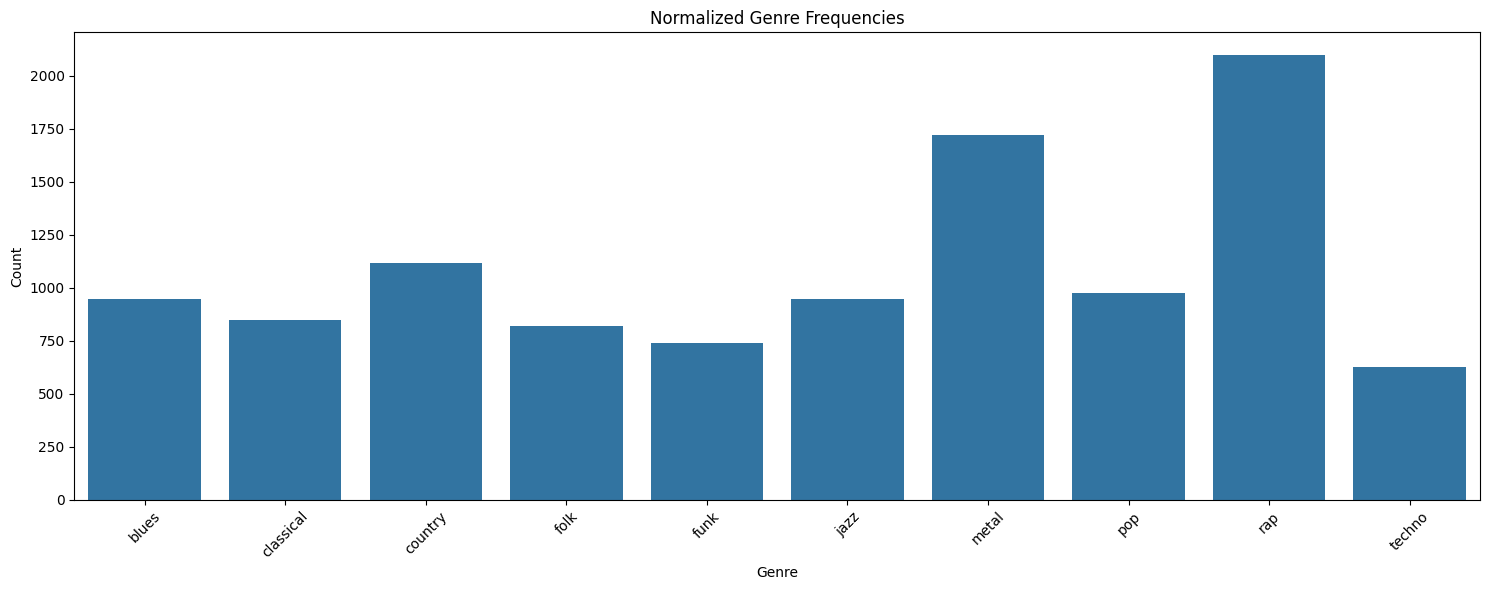

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# --- Encoding/Standardizing X ---
# Remove compex object variables
if np.iscomplexobj(X):
    X = np.abs(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Counting Labels ---
# Check class counts.
counter = Counter(y)
print("Class counts:", counter)

# Keep only classes with at least n samples. At least 2  or any other % 2 == 0 number
n = 600
classes_to_keep = {cls for cls, count in counter.items() if count >= n}
indices_to_keep = [i for i, label in enumerate(y) if label in classes_to_keep]

y = np.array(y)

# Filter the data.
X_filtered = X_scaled[indices_to_keep]
y_filtered = y[indices_to_keep]

# Encode the Genres into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

freq_leftover = Counter(y_encoded)
leftover_genres = list(freq_leftover.keys())
leftover_counts = list(freq_leftover.values())

fig, axs = plt.subplots(figsize=(15, 6))

# Plot normalized label frequencies.
sns.barplot(x=leftover_genres, y=leftover_counts, ax=axs)
axs.set_title("Normalized Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)
axs.set_xticklabels(le.classes_)

plt.tight_layout()
plt.show()


# Remove highly collerating data

Dropping columns: ['feature_5', 'feature_8', 'feature_9', 'feature_10', 'feature_12', 'feature_14', 'feature_16', 'feature_20', 'feature_21', 'feature_23', 'feature_25', 'feature_26', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_34', 'feature_37', 'feature_38', 'feature_41', 'feature_43', 'feature_44', 'feature_46', 'feature_48', 'feature_50', 'feature_51', 'feature_53']


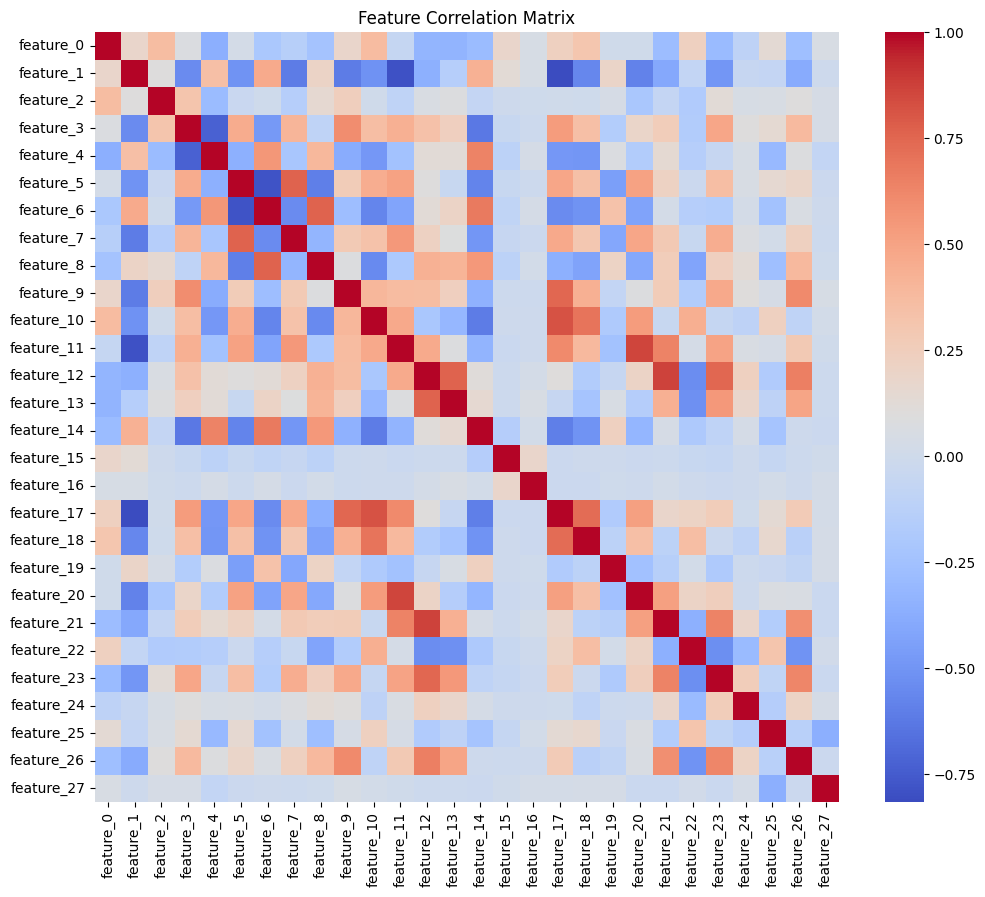

In [10]:
import pandas as pd
import numpy as np

CORRELATING_VALUE = 0.9

X = X_filtered

def remove_highly_correlated_features(X, threshold):
    # If X is a NumPy array, convert it to a DataFrame.
    if isinstance(X, np.ndarray):
        # Create column names if not provided
        X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
    else:
        X_df = X.copy()
    
    # Compute the absolute correlation matrix
    corr_matrix = X_df.corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify columns to drop: any feature with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("Dropping columns:", to_drop)
    
    # Drop these columns from the dataframe
    X_df_reduced = X_df.drop(columns=to_drop)
    
    # If original X was a NumPy array, return as a NumPy array.
    if isinstance(X, np.ndarray):
        return X_df_reduced.values
    else:
        return X_df_reduced


X_reduced = remove_highly_correlated_features(X, threshold=CORRELATING_VALUE)

# -- Create a feature correlation matrix --
df_features = pd.DataFrame(X_reduced, columns=[f'feature_{i}' for i in range(X_reduced.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

X_filtered = X_reduced


# Create a Test-Train split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (8672, 28) (8672,)
Test set shape: (2168, 28) (2168,)


# Hyperparameter tuning

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 25)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Set up the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Get the best model
final_model = grid_search.best_estimator_

# Optional: print best parameters
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")


Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validated accuracy: 0.6753


# Evaluation Charts

## Confusion Matrix - Shows what was the predicted value compared to the true value when evaluating the Model

The more values in the diagonal line the better

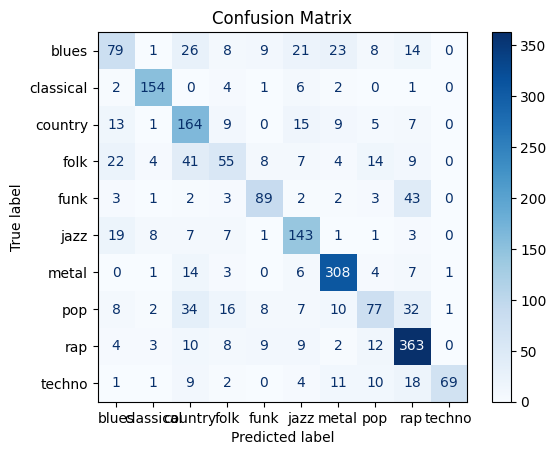

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = final_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')

import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()